In [40]:
from types import SimpleNamespace
from pathlib import Path
import os 
import numpy as np

from tabulate import tabulate

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
_ = Path('.').resolve()
os.chdir('../scripts')
from get_best_biases import main as get_biases
os.chdir(_)

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import logging
import sys
logging.basicConfig(stream=sys.stdout, 
                    level=logging.WARNING,
                    format='%(levelname)s:%(name)s:%(funcName)s:%(message)s')

In [45]:
import matplotlib.pyplot as plt
import copy

In [53]:
args = SimpleNamespace(
    corrf_multisim_path = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf_compare_abacus'),
    corrf_box_name = 'logn_bias3_multibias',
    theory_path = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/CoLoRe_boxes/compare_abacus/logn_bias3_multibias_try5'),
    theory_lognormal = False,
    theory_source = 1,
    rsd = True,
    rmin = 0.1, 
    rmax = 200,
    N_bins = 41,
    zmin = 1.2,
    zmax = 1.6,
    nside = 2, 
    fitter_poles = [0],
    fitter_rmin = {0:30, 2:30},
    fitter_rmax = {0:80, 2:80},
    fitter_bias0 = 1,
    log_level = 'WARNING',
    print_values=False
)

# noRSD

In [47]:
class helper:
    def __str__(self):
        return self.label

lognormal = helper()
lognormal.label = 'lognormal'
lognormal.args = copy.copy(args)
lognormal.args.rsd = False
lognormal.args.corrf_box_name = 'logn_bias3_multibias_try3'
lognormal.in_b, lognormal.out_b = get_biases(lognormal.args)

lpt = helper()
lpt.label = '2LPT'
lpt.args = copy.copy(args)
lpt.args.rsd = False
lpt.args.corrf_box_name = '2lpt_bias3_multibias_try3'
lpt.in_b, lpt.out_b = get_biases(lpt.args)

for analysis in lognormal, lpt:
    analysis.in_b = np.asarray([float(b) for b in analysis.in_b])
    analysis.out_b= np.asarray([float(b) for b in analysis.out_b])

AssertionError: 

In [18]:
lognormal.color='blue'
lpt.color='red'

In [19]:
%matplotlib widget

In [20]:
for analysis in lognormal, lpt:
    analysis.model = LinearRegression()
    analysis.model.fit(analysis.in_b[1:].reshape((len(analysis.in_b[1:]), 1)), analysis.out_b[1:])

AttributeError: 'helper' object has no attribute 'in_b'

In [ ]:
fig, ax = plt.subplots()

in_b = np.linspace(2.5, 4, 100)
for analysis in lognormal,lpt:
    ax.scatter(analysis.in_b[1:], analysis.out_b[1:], c=analysis.color, label=analysis)
    ax.plot(in_b, analysis.model.predict(in_b.reshape((len(in_b)),1)), c=analysis.color, linestyle='dashed')

ax.legend()
ax.grid()
ax.set_xlabel('input bias')
ax.set_ylabel('best bias');

In [ ]:
for analysis in lognormal, lpt:
    print(analysis)
    table = np.asarray([analysis.in_b, analysis.out_b])
    print(tabulate(table.transpose(), headers=['in B', 'best B'], floatfmt=".2f"))
    print('\n')

In [ ]:
def get_b_from_B(B, analysis):
    return (B-analysis.model.intercept_)/analysis.model.coef_

In [ ]:
get_b_from_B(2.145, lognormal)

In [ ]:
get_b_from_B(2.145, lpt)

# RSD

In [63]:
class helper:
    def __str__(self):
        return self.label

lognormal = helper()
lognormal.label = 'lognormal'
lognormal.args = copy.copy(args)
lognormal.args.rsd = True
lognormal.args.corrf_box_name = 'logn_bias3_multibias'
lognormal.in_b, lognormal.out_b = get_biases(lognormal.args)

lpt = helper()
lpt.label = '2LPT'
lpt.args = copy.copy(args)
lpt.args.rsd = True
lpt.args.corrf_box_name = '2lpt_bias3_multibias'
lpt.in_b, lpt.out_b = get_biases(lpt.args)

for analysis in lognormal, lpt:
    analysis.in_b = np.asarray([float(b) for b in analysis.in_b])
    analysis.out_b= np.asarray([float(b) for b in analysis.out_b])

In [64]:
lognormal.color='blue'
lpt.color='red'

In [65]:
inb, outb = get_biases(args)

In [66]:
for analysis in lognormal, lpt:
    analysis.model = LinearRegression()
    analysis.model.fit(analysis.in_b.reshape((len(analysis.in_b), 1)), analysis.out_b)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
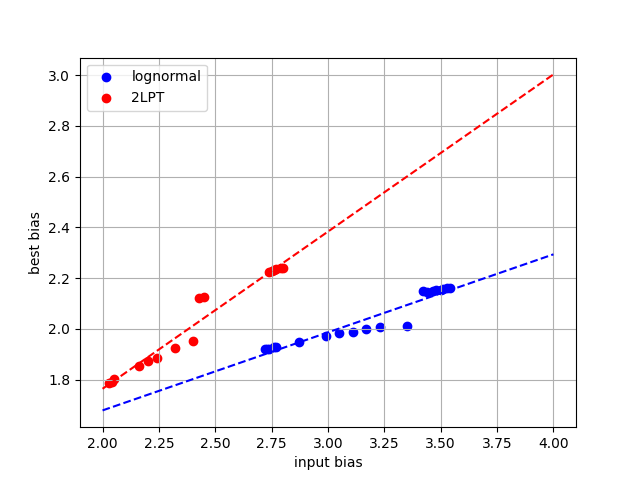

In [67]:
fig, ax = plt.subplots()

in_b = np.linspace(2, 4, 100)
for analysis in lognormal,lpt:
    ax.scatter(analysis.in_b, analysis.out_b, c=analysis.color, label=analysis)
    ax.plot(in_b, analysis.model.predict(in_b.reshape((len(in_b)),1)), c=analysis.color, linestyle='dashed')

ax.legend()
ax.grid()
ax.set_xlabel('input bias')
ax.set_ylabel('best bias');

In [68]:
for analysis in lognormal, lpt:
    print(analysis)
    table = np.asarray([analysis.in_b, analysis.out_b])
    print(tabulate(table.transpose(), headers=['in B', 'best B']))
    print('\n')

lognormal
  in B    best B
------  --------
 2.72    1.91925
 2.73    1.92033
 2.74    1.92139
 2.76    1.92791
 2.77    1.92688
 2.87    1.94937
 2.99    1.97058
 3.05    1.98283
 3.11    1.98868
 3.17    2.00099
 3.23    2.00795
 3.35    2.01336
 3.42    2.14951
 3.44    2.14696
 3.465   2.15108
 3.48    2.15454
 3.5     2.15332
 3.51    2.15665
 3.53    2.1606
 3.54    2.16274


2LPT
  in B    best B
------  --------
  2.03   1.78865
  2.04   1.79067
  2.05   1.80092
  2.16   1.85216
  2.2    1.87177
  2.24   1.88641
  2.32   1.92424
  2.4    1.95383
  2.43   2.12199
  2.45   2.1268
  2.74   2.22529
  2.75   2.2265
  2.76   2.23239
  2.77   2.23594
  2.79   2.23956
  2.8    2.24083




In [69]:
def get_b_from_B(B, analysis):
    return (B-analysis.model.intercept_)/analysis.model.coef_

In [70]:
get_b_from_B(2.0381347426902927, lognormal)

array([3.16838859])

In [71]:
get_b_from_B(2.0381347426902927, lpt)

array([2.44243212])

If ignore first bias (if it is 0)

In [14]:
for analysis in lognormal, lpt:
    analysis.model = LinearRegression()
    analysis.model.fit(analysis.in_b[1:].reshape((len(analysis.in_b[1:]), 1)), analysis.out_b[1:])

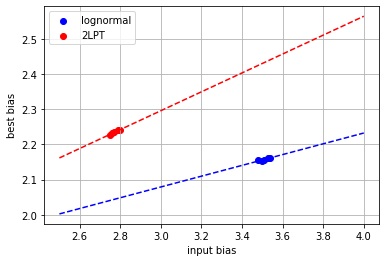

In [15]:
fig, ax = plt.subplots()

in_b = np.linspace(2.5, 4, 100)
for analysis in lognormal,lpt:
    ax.scatter(analysis.in_b[1:], analysis.out_b[1:], c=analysis.color, label=analysis)
    ax.plot(in_b, analysis.model.predict(in_b.reshape((len(in_b)),1)), c=analysis.color, linestyle='dashed')

ax.legend()
ax.grid()
ax.set_xlabel('input bias')
ax.set_ylabel('best bias');

In [16]:
for analysis in lognormal, lpt:
    print(analysis)
    table = np.asarray([analysis.in_b, analysis.out_b])
    print(tabulate(table.transpose(), headers=['in B', 'best B']))
    print('\n')

lognormal
  in B    best B
------  --------
 3.465   2.15108
 3.48    2.15454
 3.5     2.15332
 3.51    2.15665
 3.53    2.1606
 3.54    2.16274


2LPT
  in B    best B
------  --------
  2.74   2.22529
  2.75   2.2265
  2.76   2.23239
  2.77   2.23594
  2.79   2.23956
  2.8    2.24083




In [17]:
def get_b_from_B(B, analysis):
    return (B-analysis.model.intercept_)/analysis.model.coef_

In [18]:
get_b_from_B(2.0381347426902927, lognormal)

array([2.73210451])

In [19]:
get_b_from_B(2.0381347426902927, lpt)

array([2.03978438])